## Machine Learning Online Class - Exercise 1: Linear Regression
Requires : numpy, matplotlib, scikit-learn

### Introduction

In this exercise, you will implement linear regression and get to see it work
on data.

### Python imports

In [34]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import animation, rc, cm
from mpl_toolkits.mplot3d import axes3d

from IPython.display import HTML

from sklearn.linear_model import LinearRegression

%matplotlib inline
rc('animation', html='html5')

## Linear regression with one variable

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck.<br> Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.<br>
The chain already has trucks in various cities and you have data for profits and populations from the cities.<br>
You would like to use this data to help you select which city to expand to next.<br>
The file ex1data1.txt contains the dataset for our linear regression problem. <br>
The first column is the population of a city and the second column is the profit of a food truck in that city.
A negative value for profit indicates a loss.

### Part 1: Basic Function

In [35]:
def warmUpExercise():
    return(np.identity(5))

In [36]:
print(warmUpExercise())

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


### Part 2 : Plotting

In [37]:
data = np.genfromtxt('ex1data1.txt', delimiter=",")

In [38]:
X = np.c_[data[:,0]]; y = np.c_[data[:,1]]

In [39]:
m = len(X) #number of training examples

#### Plotting function

In [40]:
def plotData(X, y):
    fig = plt.figure()
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    axes.plot(X, y, 'rx', ms =10)
    axes.set_xlabel('Population of City in 10,000s')
    axes.set_ylabel('Profit in $10,000s')
    axes.set_title('Profit vs population')
    plt.show()

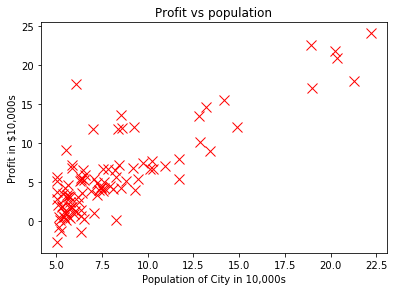

In [41]:
plotData(X,y)

### Part 3 : Cost and Gradient descent

The objective of linear regression is to find the parameters $\theta$ that minimize the cost function (mean-squared error) : 
$$J(\theta)=\frac{1}{2m}\sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})^2  $$
where the hypothesis $h_{\theta}(x)$ is given by the linear model :
$$h_{\theta}(x) = \theta^Tx  = \theta_0 + \theta_1 x_1 $$
In vectorized form :
$$J(\theta)=\frac{1}{2m}(X \theta - y)^T(X \theta - y)$$

In [42]:
X = np.c_[np.ones(m),data[:,0]] # Add a column of ones to x (intercept)

In [43]:
theta = np.array([0,0]) # initialize fitting parameters

#### Some gradient descent parameters

In [44]:
iterations = 1500
alpha = 0.01

#### Cost function

In [45]:
def computeCost(X, y, theta):
    m = len(y)
    theta = theta.reshape(-1,1)
    J = (1 / (2 * m)) * (X.dot(theta) - y).T.dot((X.dot(theta)-y))
    return np.asscalar(J)

In [46]:
J = computeCost(X, y, theta)

In [47]:
print("With theta = [0 ; 0]\nCost computed = {:6.2f} \n".format(J));
print('Expected cost value (approx) 32.07\n');

With theta = [0 ; 0]
Cost computed =  32.07 

Expected cost value (approx) 32.07



#### Further testing on the cost function

In [48]:
J = computeCost(X, y, np.array([-1,2]))

In [49]:
print("With theta = [-1 ; 2]\nCost computed = {:6.2f} \n".format(J));
print('Expected cost value (approx) 54.24\n');

With theta = [-1 ; 2]
Cost computed =  54.24 

Expected cost value (approx) 54.24



#### Gradient descent

One way to minimize the cost function is to used the batch gradient descent algorithm.<br>
In batch gradient descent, each iteration performs the update :
$$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)}) x_j^{(i)}$$


In [50]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    theta = theta.reshape(-1,1)
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        J_history[iter] = computeCost(X, y, theta)
        theta = theta - (alpha / m) * X.T.dot(X.dot(theta)-y)
        
    return (theta, J_history)

In [51]:
theta = np.array([0,0])
(theta, J_history) = gradientDescent(X, y, theta, alpha, iterations)

In [52]:
print('Theta found by gradient descent:\n')
print("{:6.4f} \n {:6.4f} \n".format(theta[0,0],theta[1,0]))
print('Expected theta values (approx)\n')
print(' -3.6303\n  1.1664\n\n')

Theta found by gradient descent:

-3.6303 
 1.1664 

Expected theta values (approx)

 -3.6303
  1.1664




#### Gradient descent animation - Decreasing cost

In [53]:
def gradientDescentAnimation(X, y, theta, alpha, num_iters):
    m = len(y)
    theta = theta.reshape(-1,1)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_xlim([0, num_iters])
    plt.ion()
    fig.show()
    fig.canvas.draw()
    
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        J_history[iter] = computeCost(X, y, theta)
        theta = theta - (alpha / m) * X.T.dot(X.dot(theta)-y)
        ax.set_title("Cost @ iteration {:d} = {:2.2f}".format(iter,J_history[iter]))
        ax.plot(iter,J_history[iter],'ro',ms=2)
        fig.canvas.draw()
        
        
    return (theta, J_history)

<IPython.core.display.Javascript object>


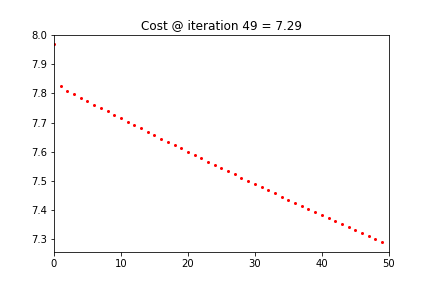

In [54]:
# Notebook backend required for animation
%matplotlib notebook
theta_anim = np.random.randn(2,1)
(theta_anim, J_history) = gradientDescentAnimation(X, y, theta_anim, alpha, 50)

# Reset to std params
plt.ioff()
%matplotlib inline

#### Plot linear fit

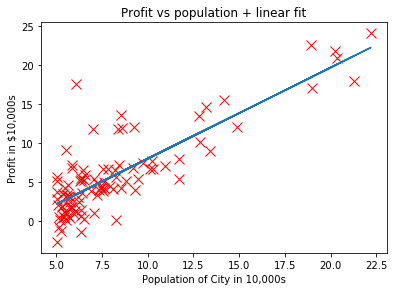

In [55]:
# Reset to std params
plt.ioff()
%matplotlib inline

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(X[:,1], y, 'rx', ms =10)
axes.plot(X[:,1], X.dot(theta), '-')
axes.set_xlabel('Population of City in 10,000s')
axes.set_ylabel('Profit in $10,000s')
axes.set_title('Profit vs population + linear fit')
plt.show()

#### Predict values for population sizes of 35,000 and 70,000

In [56]:
predict1 = theta.T.dot(np.array([1,3.5]))

In [57]:
print("For population = 35,000, we predict a profit of {:6.1f}\n".format(10000 * predict1[0]))

For population = 35,000, we predict a profit of 4519.8



In [58]:
predict2 = theta.T.dot(np.array([1,7]))

In [59]:
print("For population = 70,000, we predict a profit of {:6.1f}\n".format(10000 * predict2[0]))

For population = 70,000, we predict a profit of 45342.5



###  Part 4: Visualizing J(theta_0, theta_1)

#### Initalize mesh grid for contour plot visualization

In [60]:
theta0_vals = np.linspace(-10,10,100)

In [61]:
theta1_vals = np.linspace(-1, 4, 100)

In [62]:
J_vals = np.zeros((len(theta0_vals),len(theta1_vals)))

In [63]:
theta0_g, theta1_g = np.meshgrid(theta0_vals, theta1_vals)

#### Fill the grid with cost values

In [64]:
for (i,j),v in np.ndenumerate(J_vals):
    J_vals[i,j] = computeCost(X,y,np.array([theta0_g[i,j], theta1_g[i,j]]))    

#### Contour plot

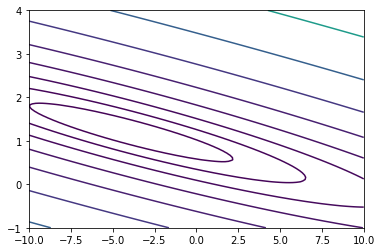

In [65]:
% matplotlib inline
plt.contour(theta0_vals,theta1_vals,J_vals,np.logspace(-2, 3, 20))

#### Gradient descent animation on contour plot

<IPython.core.display.Javascript object>


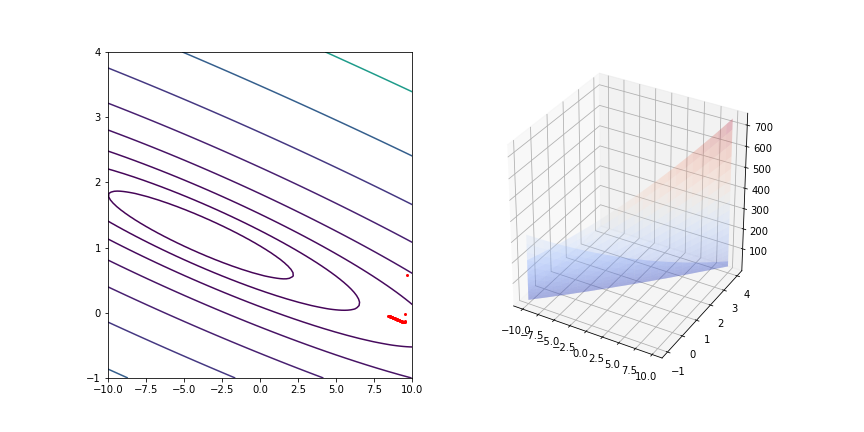

In [66]:
# Notebook backend required for animation
%matplotlib notebook
theta = np.array([10,4])
theta = theta.reshape(-1,1)

m = len(y)
alpha = 0.01
iterations = 50

plt.ion()
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(122,projection='3d')
ax1.contour(theta0_vals,theta1_vals,J_vals,np.logspace(-2, 3, 20))
ax2.plot_surface(theta0_vals,theta1_vals,J_vals,rstride=4, cstride=4, alpha = 0.25,cmap='coolwarm')

fig.show()
fig.canvas.draw()
    
   
for iter in np.arange(iterations):
    theta = theta - (alpha / m) * X.T.dot(X.dot(theta)-y)
    ax1.plot(theta[0,0],theta[1,0],'ro',ms=2)
    fig.canvas.draw()
        

# Reset to std params
plt.ioff()
%matplotlib inline



### Comparison with sklearn linear regression

In [67]:
data = np.genfromtxt('ex1data1.txt', delimiter=",")

In [68]:
X = np.c_[data[:,0]]; y=np.c_[data[:,1]]

In [69]:
lm = LinearRegression()

In [70]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
theta = np.c_[lm.intercept_, lm.coef_]

In [72]:
print(theta)

[[-3.89578088  1.19303364]]


## Linear regression with multiple variables

### Part 1 : Feature normalization
When features differ by order of magnitude, first performing scaling can make gradient descent converge much more quickly

In [73]:
data = np.genfromtxt('ex1data2.txt', delimiter=",")
X = np.c_[data[:,:2]]
y = np.c_[data[:,2]]

In [74]:
m = len(data)

In [75]:
np.set_printoptions(suppress=True)
print("First 10 examples of the dataset")
print("X =\n {}, \n\n y =\n {} ".format(X[:10],y[:10]))

First 10 examples of the dataset
X =
 [[ 2104.     3.]
 [ 1600.     3.]
 [ 2400.     3.]
 [ 1416.     2.]
 [ 3000.     4.]
 [ 1985.     4.]
 [ 1534.     3.]
 [ 1427.     3.]
 [ 1380.     3.]
 [ 1494.     3.]], 

 y =
 [[ 399900.]
 [ 329900.]
 [ 369000.]
 [ 232000.]
 [ 539900.]
 [ 299900.]
 [ 314900.]
 [ 198999.]
 [ 212000.]
 [ 242500.]] 


In [76]:
def featureNormalize(X):
    mu = np.average(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu)/sigma
    
    return X_norm,mu,sigma    

In [77]:
(X,mu,sigma) = featureNormalize(X)

In [78]:
# Add intercept
X = np.c_[np.ones(m),X]

### Part 2: Gradient Descent

In [79]:
# Choose some alpha
alpha = 0.01
num_iters = 400

In [80]:
# Initialize theta and run gradient descent (gradientDescent function can be used)
theta = np.zeros((3,1))
[theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters)

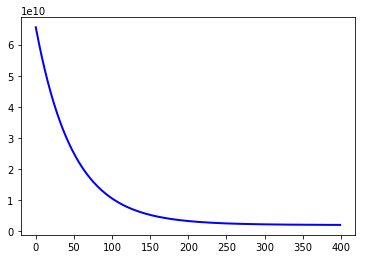

In [81]:
# Plot convergence graph
plt.plot(J_history,'-b',lw=2)

In [82]:
# Display gradient descent results
print('Theta computed from gradient descent: \n')
print(theta)

Theta computed from gradient descent: 

[[ 334302.06399328]
 [  99411.44947359]
 [   3267.01285407]]


In [83]:
# Estimate the price of a 1650 sq-ft, 3 br house
item = np.array([1,1650,3])
item_norm = np.zeros(3)
item_norm[1:] = (item[1:] - mu)/sigma
item_norm[0]=item[0]
price = item_norm.dot(theta) 
print ("Predicted price for a 1650 sq-ft, 3 br house : ${:2.0f} ".format(price[0]))

Predicted price for a 1650 sq-ft, 3 br house : $289222 


### Part 3 : Normal equations
A closed-form solution for linear regression is :
$$ \theta = (X^T X)^{-1}X^T y $$ 

In [84]:
data = np.genfromtxt('ex1data2.txt', delimiter=",")
X = np.c_[data[:,:2]]; y = np.c_[data[:,2]]
m = len(y)

In [85]:
def normalEqn(X, y):
    return np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

In [86]:
theta = normalEqn(X, y)

In [87]:
print('Theta computed from normal equation: \n')
print(theta)

Theta computed from normal equation: 

[[   140.86108621]
 [ 16978.19105904]]


In [90]:
# Estimate the price of a 1650 sq-ft, 3 br house
item = np.array([1650,3])
price = item.dot(theta) 
print ("Predicted price for a 1650 sq-ft, 3 br house : ${:2.0f} ".format(price[0]))

Predicted price for a 1650 sq-ft, 3 br house : $283355 


### END